# Police Killing in USA

In [1]:
# import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
# Load the dataset to data frame

url='https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv'
Death_data=pd.read_csv(url)
House_Hold_Income=pd.read_excel('C:/Users/user/Dataset/Data science project/Other Projects/Police Burtality in USA/MedianHouseholdIncome2015v1.xlsx')
Below_Poverty_level=pd.read_excel('C:/Users/user/Dataset/Data science project/Other Projects/Police Burtality in USA/PercentagePeopleBelowPovertyLevel.xlsx')
Completed_High_school=pd.read_excel('C:/Users/user/Dataset/Data science project/Other Projects/Police Burtality in USA/PercentOver25CompletedHighSchool.xlsx')
Race_by_city=pd.read_excel('C:/Users/user/Dataset/Data science project/Other Projects/Police Burtality in USA/ShareRaceByCity.xlsx')

In [3]:
Death_data.describe()

,id,age,longitude,latitude
count,5902.000000,5650.000000,5616.000000,5616.000000
mean,3274.489665,37.181593,-97.222541,36.665374
std,1847.539172,13.060447,16.625941,5.384481
min,3.000000,6.000000,-158.137000,19.498000
25%,1674.250000,27.000000,-112.117500,33.476750
50%,3277.500000,35.000000,-94.372500,36.101000
75%,4882.750000,46.000000,-83.054000,39.973000
max,6448.000000,91.000000,-68.014000,71.301000


In [4]:
House_Hold_Income.describe()

,Geographic Area,City,Median Income
count,29322,29322,29271
unique,51,24249,14592
top,PA,Franklin city,(X)
freq,1762,16,1113


In [5]:
Below_Poverty_level.describe()

,Geographic Area,City,poverty_rate
count,29329,29329,29329
unique,51,24255,771
top,PA,Franklin city,0
freq,1762,16,1464


In [6]:
Completed_High_school.describe()

,Geographic Area,City,percent_completed_hs
count,29329,29329,29329
unique,51,24255,728
top,PA,Franklin city,100
freq,1762,16,1301


In [7]:
Race_by_city.describe()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29268,29268,29268,29268,29268,29268,29268
unique,51,24219,997,926,628,409,956
top,PA,Franklin city,100,0,0,0,0
freq,1764,16,1051,6587,6930,8537,2489


In [8]:
Death_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [9]:
House_Hold_Income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [10]:
Below_Poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [11]:
Completed_High_school.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [12]:
Race_by_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


### Data Cleaning

In [13]:
# checking for null values in House_Hold_Income
House_Hold_Income.isnull().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [14]:
# checking for null values in Below_Poverty_level
Below_Poverty_level.isnull().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [15]:
# checking for null values in Completed_High_school
Completed_High_school.isnull().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [16]:
# cheking for null value in Race_by_city (X)
Race_by_city.isnull().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [17]:
Death_data.isnull().sum()

id                           0
name                       202
date                         0
manner_of_death              0
armed                      212
age                        252
gender                       1
race                       549
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       327
body_camera                  0
longitude                  286
latitude                   286
is_geocoding_exact           0
dtype: int64

In [18]:
Death_data['race'].unique()
# Replace the Unique value with Name
Death_data['race']=Death_data['race'].replace('A','Asian')
Death_data['race']=Death_data['race'].replace('W','White')
Death_data['race']=Death_data['race'].replace('H','Hispanic')
Death_data['race']=Death_data['race'].replace('B','Black')
Death_data['race']=Death_data['race'].replace('O','Other')
Death_data['race']=Death_data['race'].replace('N','Native American')
Death_data['race'].head()

0       Asian
1       White
2    Hispanic
3       White
4    Hispanic
Name: race, dtype: object

In [19]:
Death_data['gender']=Death_data['gender'].replace('M','Male')
Death_data['gender']=Death_data['gender'].replace('F','Female')
Death_data['gender'].value_counts()

Male      5644
Female     257
Name: gender, dtype: int64

In [20]:
Death_data['name']=Death_data['name'].replace(np.nan, 'Unknown')
# There are few assumptions that will be made in this analysis for missing values
# if there is null value available in in 'armed'  the null value will be replaced with 	unarmed
Death_data['armed']=Death_data['armed'].replace(np.nan, 'unarmed')
# The age value will be replaced with average american age of 37.9 years
Death_data['age']=Death_data['age'].replace(np.nan, 37.9)
# since the race have missing value it will be replaced with unknown
# Death_data['race']=Death_data['race'].replace(np.nan,'Unknown')
# The missing value in gender will be replaced with maximum value
Death_data['gender']=Death_data['gender'].replace(np.nan,'Male')
# The missing value in flee will be replace with 'Not Fleeing'
Death_data['flee']=Death_data['flee'].replace(np.nan,'Not fleeing')
# The null value in lattitude and longitude will be dropped
Death_data=Death_data.dropna(axis=0)
# removing jr
Death_data['name']=Death_data['name'].str.replace(' Jr.', '')

In [21]:
Death_data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
dtype: int64

In [22]:
Death_data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [23]:
# Spliting the first name and last name
def Splitname(row):
    # for First name
    row['First_Name']=row['name'].split(' ')[0]
    # for Last name
    row['Last_Name']=row['name'].split(' ')[-1]
    # Strip the unwanted spaces 
    row['First_Name'],row['Last_Name']=row['First_Name'].strip(),row['Last_Name'].strip()
    # now Return the Row
    return row

# Apply the def across the data frame 
Death_data=Death_data.apply(Splitname,axis='columns')
Death_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,First_Name,Last_Name
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,Tim,Elliot
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,Lewis,Lembke
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,John,Quintero
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,Matthew,Hoffman
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,Michael,Rodriguez


In [24]:
First_Name = pd.DataFrame(Death_data.First_Name.value_counts().reset_index().values, columns=["First_Name", "Count"])
First_Nameindex = First_Name.sort_index(axis = 0, ascending=True)
First_Name
# Remove Unknown
i=First_Name[(First_Name.First_Name =='Unknown')].index
First_Name=First_Name.drop(i)
# Take top 15
First_Name_15 = First_Name.loc[0:15]
First_Name_15

,First_Name,Count
0,Michael,145
1,David,86
2,James,82
3,Robert,81
4,Christopher,79
5,John,71
6,William,70
7,Joshua,63
8,Daniel,60
9,Anthony,57


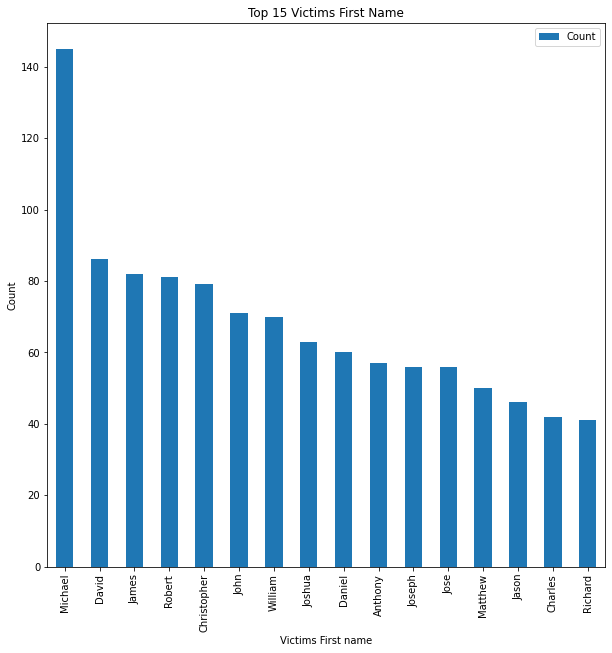

In [25]:
# Bar Graph was developed to find top 15 first name of victims
ax=First_Name_15.plot(kind='bar',x='First_Name',y='Count',rot=90,figsize=(10,10))
plt.title('Top 15 Victims First Name')
plt.xlabel('Victims First name')
plt.ylabel('Count')
figure = ax.get_figure()
figure.savefig('Top 15 Victims first name', dpi=100)
plt.show()
plt.close()

In [26]:
# Creating a data frame for Last_Name
Last_Name = pd.DataFrame(Death_data.Last_Name.value_counts().reset_index().values, columns=["Last_Name", "Count"])
Last_Nameindex = Last_Name.sort_index(axis = 0, ascending=True)
Last_Name


# Remove Unknown
i=Last_Name[(Last_Name.Last_Name =='Unknown')].index
Last_Name=Last_Name.drop(i)

# Take top 15
Last_Name_15 = Last_Name.loc[0:15]
Last_Name.Last_Name.unique()

array(['Smith', 'Johnson', 'Williams', ..., 'Guilliford', 'Elioff',
       'Naylor'], dtype=object)

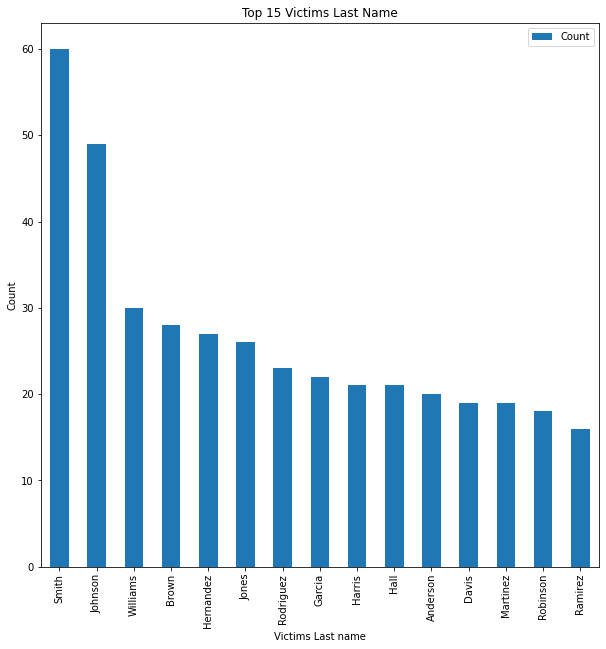

In [27]:
# Bar Graph was developed to find top 15 last name of victims
ax=Last_Name_15.plot(kind='bar',x='Last_Name',y='Count',rot=90,figsize=(10,10))
plt.title('Top 15 Victims Last Name')
plt.xlabel('Victims Last name')
plt.ylabel('Count')
figure = ax.get_figure()
figure.savefig('Top 15 Victims Last name', dpi=100)
plt.show()
plt.close()

Used the codes form 
https://www.kaggle.com/mehmetramazanektirir/data-analysis-and-visualization-with-seaborn

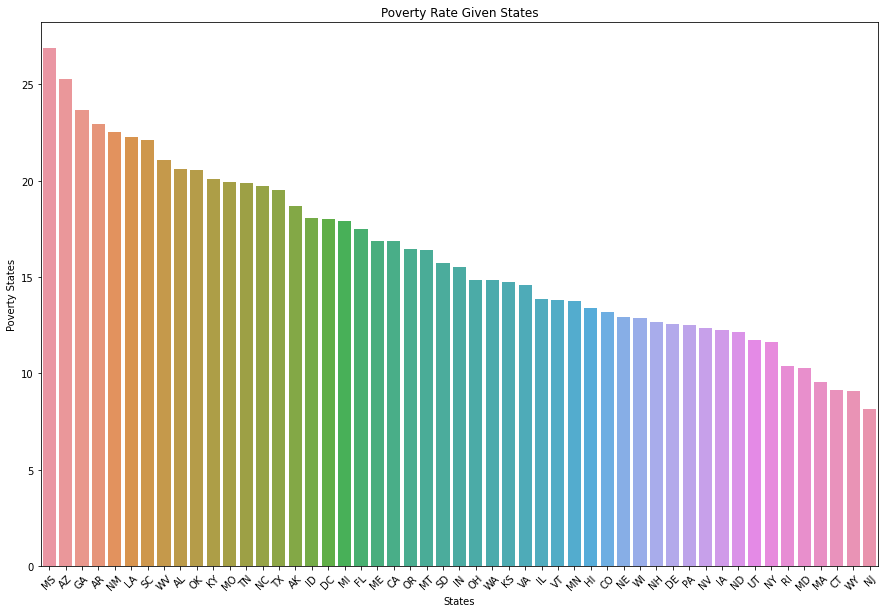

In [28]:
#Poverty rate of each state

#Poverty Rate'in value count'sına baktığımız zaman '-' kısmında 201 adet veri vardı bunu 0'a eşitlememiz gerekiyor.
Below_Poverty_level.replace(['-'],0.0,inplace = True) #Eşitledik
Below_Poverty_level.poverty_rate = Below_Poverty_level.poverty_rate.astype(float) #Daha sonra veri tipini object'ten float'a çevirdik.

area_list = list(Below_Poverty_level["Geographic Area"].unique()) #Eyaletleri listeye yolladık.
area_poverty_ratio = []

for i in area_list:
    x = Below_Poverty_level[Below_Poverty_level['Geographic Area'] == i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending = False)).index.values
sorted_data = data.reindex(new_index)

#Visualization

plt.figure(figsize = (15,10))
ax=sns.barplot(x = sorted_data["area_list"], y = sorted_data["area_poverty_ratio"])
plt.xticks(rotation = 45)
plt.xlabel('States')
plt.ylabel('Poverty States')
plt.title("Poverty Rate Given States")
figure = ax.get_figure()
figure.savefig('Poverty Rate Given States', dpi=100)
plt.show()
plt.close()

In [29]:
Completed_High_school

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


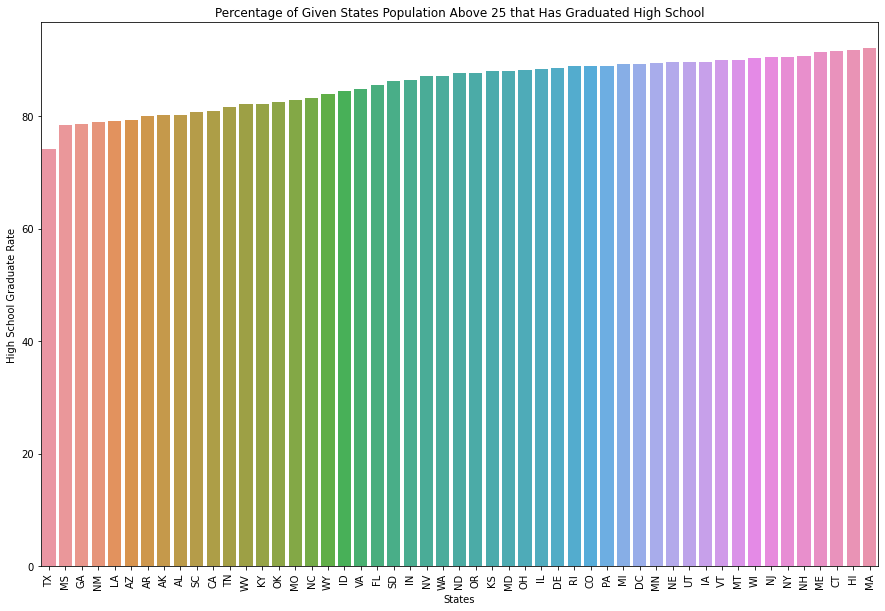

In [30]:
# Replcae null values
Completed_High_school['percent_completed_hs']=Completed_High_school['percent_completed_hs'].replace('-',0.00)


area_list = Completed_High_school['Geographic Area'].unique()
area_highschool = []
for i in area_list:
    x = Completed_High_school[Completed_High_school["Geographic Area"] == i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)

#sorted    
data = pd.DataFrame({'area_list':area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending = True)).index.values
sorted_data2 = data.reindex(new_index)

#visualization
plt.figure(figsize=(15,10))
ax=sns.barplot(x = sorted_data2["area_list"],y = sorted_data2["area_highschool_ratio"])
plt.xticks(rotation = 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title('Percentage of Given States Population Above 25 that Has Graduated High School')
figure = ax.get_figure()
figure.savefig('Percentage of Given States Population Above 25 that Has Graduated High School', dpi=100)
plt.show()
plt.close()

In [31]:
sorted_data2

,area_list,area_highschool_ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363
2,AZ,79.218182
3,AR,79.949538
1,AK,80.098028
0,AL,80.163419
40,SC,80.645707


In [32]:
House_Hold_Income.rename(columns={'Median Income':'Median_Income'},inplace = True)
House_Hold_Income.head()

,Geographic Area,City,Median_Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [33]:
# Replacing wrong value House_Hold_Income
House_Hold_Income['Median_Income']=House_Hold_Income['Median_Income'].replace('(X)',0.00)
House_Hold_Income['Median_Income']=House_Hold_Income['Median_Income'].replace('... ',0.00)
House_Hold_Income['Median_Income']=House_Hold_Income['Median_Income'].replace('-',0.00)
House_Hold_Income['Median_Income']=House_Hold_Income['Median_Income'].replace('2,500-','2500')
House_Hold_Income['Median_Income']=House_Hold_Income['Median_Income'].replace('250,000+','250000')
House_Hold_Income['Median_Income']=House_Hold_Income['Median_Income'].replace('+','')
# replacing the us median household income for null values
House_Hold_Income['Median_Income']=House_Hold_Income['Median_Income'].replace('65,712','65712')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Unrecognized location 'Lower Right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


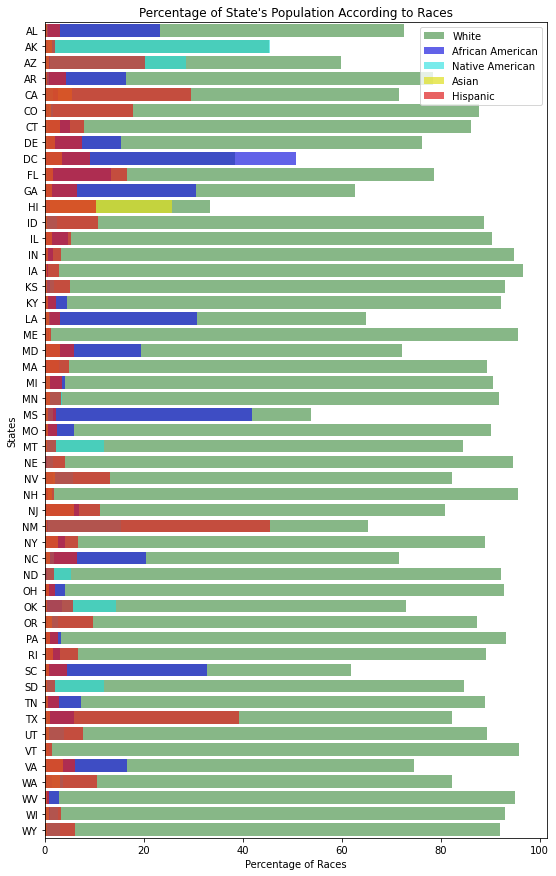

In [34]:

# Replace the (X) in Race_by_city with 0
Race_by_city['share_white']=Race_by_city['share_white'].replace('(X)',0)
Race_by_city['share_black']=Race_by_city['share_black'].replace('(X)',0)
Race_by_city['share_native_american']=Race_by_city['share_native_american'].replace('(X)',0)
Race_by_city['share_asian']=Race_by_city['share_asian'].replace('(X)',0)
Race_by_city['share_hispanic']=Race_by_city['share_hispanic'].replace('(X)',0)

area_list = Race_by_city['Geographic area'].unique()

share_white=[]
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]



# for loop for making sure that the values
for i in area_list:
    x = Race_by_city[Race_by_city["Geographic area"] == i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

#Visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x = share_white, y = area_list, color = "green", alpha = 0.5, label = "White")
sns.barplot(x = share_black, y = area_list, color = "blue",  alpha = 0.7, label = "African American") 
sns.barplot(x = share_native_american, y = area_list, color = "cyan", alpha = 0.6, label = "Native American")
sns.barplot(x = share_asian, y = area_list, color = "yellow", alpha = 0.7, label = "Asian")
sns.barplot(x = share_hispanic, y = area_list, color = "red",alpha = 0.7, label = "Hispanic") 

ax.legend(loc = "Lower Right", frameon = True) #Legendlarin Görünürlüğü
ax.set(xlabel = "Percentage of Races", ylabel = "States", title = "Percentage of State's Population According to Races")
figure = ax.get_figure()
figure.savefig('Percentage of States Population According to Races', dpi=100)
plt.show()
plt.close()

In [75]:
Race_by_city

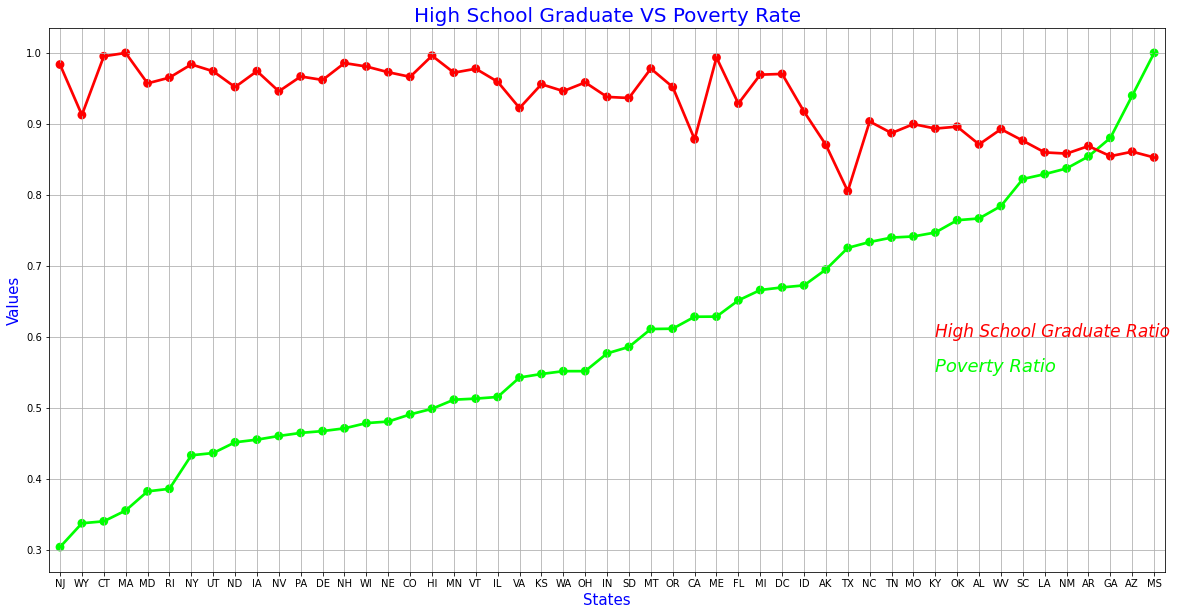

In [35]:
#High School Graduation rate vs Poverty rate of each state

#for high school graduation ratio per each state, we defined that as sorted_data above codes.
#for poverty rate of each state also we defined that as sorted_data2 above codes.

sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)
#Visualize

f,ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x = "area_list", y = "area_poverty_ratio", data = data, color = "lime", alpha = 0.8)
sns.pointplot(x = "area_list", y = "area_highschool_ratio", data = data, color = "red", alpha = 0.8)
plt.text(40, 0.6, "High School Graduate Ratio", color = "red", fontsize = 17, style = "italic")
plt.text(40, 0.55, "Poverty Ratio", color = "lime", fontsize = 18, style = "italic")
plt.xlabel("States", fontsize = 15, color = "blue")
plt.ylabel("Values", fontsize = 15, color = "blue")
plt.title("High School Graduate VS Poverty Rate", fontsize = 20, color = "blue")
plt.grid()
figure = ax1.get_figure()
figure.savefig('High School Graduate VS Poverty Rate', dpi=100)
plt.show()
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


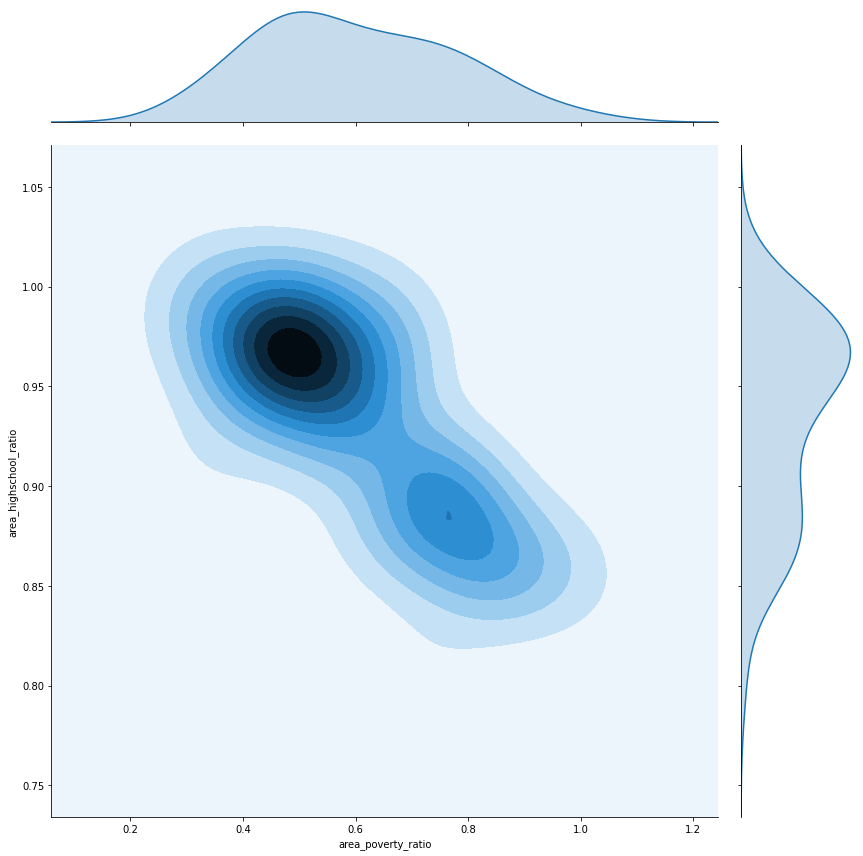

In [36]:
#Joint Plot

#High School Graduation rate vs Poverty rate of each state with different style of searborn code

#joint kernel density

#pearsonr = if it is 1, where is positive correlation and if it is, -1 there is negative correlation.

#If it is zero, there is no correlation between variables

#Show the joint distribution using kernel density estimation

g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind = "kde", size = 12)
plt.savefig("graph.png")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


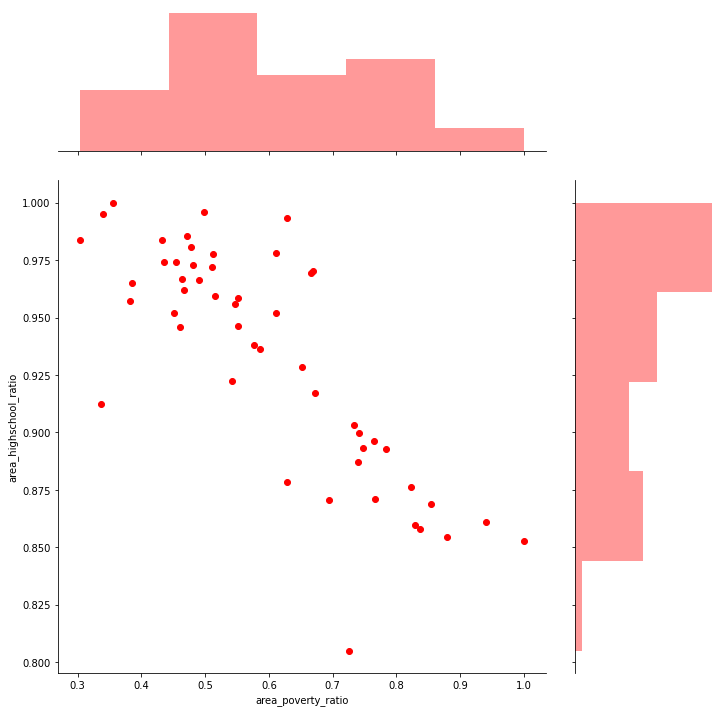

In [37]:
# you can change parameters of joint plot

# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }

# Different usage of parameters but same plot with previous one

g = sns.jointplot("area_poverty_ratio","area_highschool_ratio", data = data, size = 10, ratio = 3, color = "r")
plt.savefig("Joint plot.png")
plt.show()

Text(0.5, 1.0, 'Killed People According to Races')

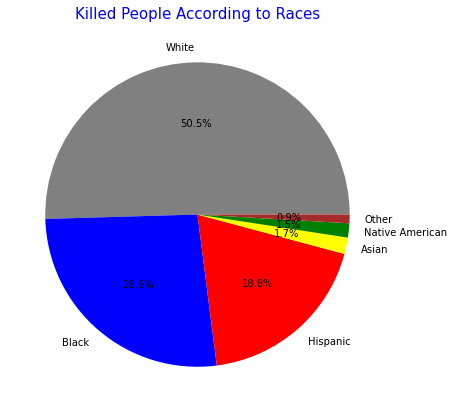

In [38]:
# Race rates according in kill data 

Death_data.race.dropna(inplace = True)#Boş olan değerler datadan çıkartıldı

labels = Death_data.race.value_counts().index

colors = ['grey','blue','red','yellow','green','brown']

explode = [0,0,0,0,0,0]

sizes = Death_data.race.value_counts().values

#Visual

plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title("Killed People According to Races", color = "blue", fontsize = 15)

In [39]:
import folium

# Map
Us_map=folium.Map(location=[45.5236, -122.6750], zoom_start=15)


# add map tiles
folium.raster_layers.TileLayer('Open Street Map').add_to(Us_map)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(Us_map)
folium.raster_layers.TileLayer('Stamen Toner').add_to(Us_map)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(Us_map)
folium.raster_layers.TileLayer('cartodbpositron').add_to(Us_map)
folium.raster_layers.TileLayer('cartodbdark_matter').add_to(Us_map)


# adding a layer for controlling the different layer

# print map
Us_map

In [40]:
death_by_states=Death_data.state.value_counts()



Death_by_states = pd.DataFrame(Death_data.state.value_counts().reset_index().values, columns=["State_Name", "Count"])
Death_by_states = Death_by_states.sort_index(axis = 0, ascending=True)
Death_by_states

,State_Name,Count
0,CA,744
1,TX,451
2,FL,354
3,AZ,226
4,CO,184
5,GA,170
6,OK,155
7,OH,154
8,NC,154
9,TN,135


In [41]:
# importing states location 
States=pd.read_csv('States.csv')

States=States.set_index('state')
States.head()
Death_by_states_with_GPS=Death_by_states.join(States, on='State_Name')

Death_by_states_with_GPS.set_index('State_Name')

,Count,latitude,longitude,name
State_Name,,,,
CA,744,36.778261,-119.417932,California
TX,451,31.968599,-99.901813,Texas
FL,354,27.664827,-81.515754,Florida
AZ,226,34.048928,-111.093731,Arizona
CO,184,39.550051,-105.782067,Colorado
GA,170,32.157435,-82.907123,Georgia
OK,155,35.007752,-97.092877,Oklahoma
OH,154,40.417287,-82.907123,Ohio
NC,154,35.759573,-79.019300,North Carolina


In [42]:
# Map layers

kill_cases=folium.Map(location=[45.5236, -122.6750], zoom_start=15, width='100%', height='100%', tiles='Open Street Map', title='Police Murders')


for (index,data) in Death_by_states_with_GPS.iterrows():
    if data.loc['Count']>500:
        folium.Circle(radius=data.loc['Count']*500, location=[data.loc['latitude'],data.loc['longitude']],
                     color='red', fill=True, fill_color='crimson', popup=data.loc[['State_Name','Count']]).add_to(kill_cases)
    elif 250<data.loc['Count']>500:
        folium.Circle(radius=data.loc['Count']*500, location=[data.loc['latitude'],data.loc['longitude']],
                     color='green', fill=True, fill_color='green', popup=data.loc[['State_Name','Count']]).add_to(kill_cases)
    elif 100<data.loc['Count']>250:
        folium.Circle(radius=data.loc['Count']*500, location=[data.loc['latitude'],data.loc['longitude']],
                     color='orange', fill=True, fill_color='coral', popup=data.loc[['State_Name','Count']]).add_to(kill_cases)
    else:
        folium.Circle(radius=data.loc['Count']*500, location=[data.loc['latitude'],data.loc['longitude']],
                     color='blue', fill=True, fill_color='blue', popup=data.loc[['State_Name','Count']]).add_to(kill_cases)
        
kill_cases

In [79]:
Race_by_city=Race_by_city.get_group(['Geographic Area'])

TypeError: unhashable type: 'list'

In [82]:
Race = pd.DataFrame(Race_by_city.mean().reset_index().values, columns=["State_Name", "share_white", 'share_black', 'share_native_american','share_asian' ,'share_hispanic'])
Race_by_states_with_GPS=Race.join(States, on='State_Name')

Race_by_states_with_GPS.set_index('State_Name')

,share_white,share_black,share_native_american,share_asian,share_hispanic,latitude,longitude,name
State_Name,,,,,,,,
AK,45.2642,0.562535,45.4772,1.37662,2.13099,63.588753,-154.493062,Alaska
AL,72.5073,23.3223,0.659343,0.479758,2.9801,32.318231,-86.902298,Alabama
AR,78.4495,16.2969,0.759889,0.477079,4.27301,35.201050,-91.831833,Arkansas
AZ,59.929,0.954545,28.5898,0.726608,20.1446,34.048928,-111.093731,Arizona
CA,71.536,2.67965,1.71517,5.54261,29.5136,36.778261,-119.417932,California
CO,87.7683,0.917686,1.62489,1.1548,17.8987,39.550051,-105.782067,Colorado
CT,86.1056,4.99231,0.656643,2.98951,7.97552,41.603221,-73.087749,Connecticut
DC,38.5,50.7,0.3,3.5,9.1,38.905985,-77.033418,District of Columbia
DE,76.2461,15.3934,0.523684,2,7.41711,38.910832,-75.527670,Delaware


In [84]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'


# Race=folium.Map(location=[45.5236, -122.6750], zoom_start=15, width='100%', height='100%', tiles='Open Street Map', title='Police Murders')
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=Race_by_states_with_GPS,
    columns=['State_Name', 'share_white'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    popup=data.loc[['State_Name','share_white']],
    legend_name='share of white in state (%)').add_to(m)
folium.LayerControl().add_to(m)

m

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


In [87]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

# Race=folium.Map(location=[45.5236, -122.6750], zoom_start=15, width='100%', height='100%', tiles='Open Street Map', title='Police Murders')
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=Race_by_states_with_GPS,
    columns=['State_Name', 'share_black'],
    key_on='feature.id',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    popup=data.loc['State_Name'],
    legend_name='share of Black in state (%)').add_to(m)
folium.LayerControl().add_to(m)

m

In [88]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

# Race=folium.Map(location=[45.5236, -122.6750], zoom_start=15, width='100%', height='100%', tiles='Open Street Map', title='Police Murders')
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=Race_by_states_with_GPS,
    columns=['State_Name', 'share_asian'],
    key_on='feature.id',
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    popup=data.loc['State_Name'],
    legend_name='share of Asian in state (%)').add_to(m)
folium.LayerControl().add_to(m)

m

In [89]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

# Race=folium.Map(location=[45.5236, -122.6750], zoom_start=15, width='100%', height='100%', tiles='Open Street Map', title='Police Murders')
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=Race_by_states_with_GPS,
    columns=['State_Name', 'share_hispanic'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    popup=data.loc['State_Name'],
    legend_name='share of Hispanic in state (%)').add_to(m)
folium.LayerControl().add_to(m)

m

In [ ]:
# 